##Load Data

In [11]:
#importing the required libraries
import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

### Path to the directory containing the image files 

In [6]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/achira_test/test')

Found 1000 files belonging to 4 classes.


**Explaination** : Here we are going into the root folder of the test and assumes that the images are organized into subdirectories based on their class, with each subdirectory containing all the images for a given class.

## Exploratory Data Analysis EDA

In [13]:
# Get the list of subdirectories (class labels) in the dataset
data = '/content/drive/MyDrive/achira_test/images'
class_labels = os.listdir(data)

# Initialize a dictionary to store the number of images in each class
class_counts = {}

In [14]:
# Iterate over each class label and count the number of images in each class
for label in class_labels:
    class_path = os.path.join(data, label)
    class_images = os.listdir(class_path)
    class_counts[label] = len(class_images)

# Print the class counts
print("Class Counts:", class_counts)

Class Counts: {'hexagon': 250, 'square': 250, 'disc': 250, 'gear': 250}


## Data Visualization

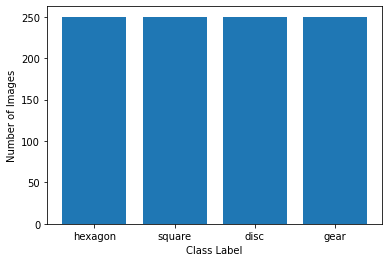

In [15]:
# Visualize the class distribution using a bar chart
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Class Label")
plt.ylabel("Number of Images")
plt.show()

**Explaination** -  Here, I am checking the no. of classes with total images in the sub directories I mean classes w.r.t total images using Bar plot

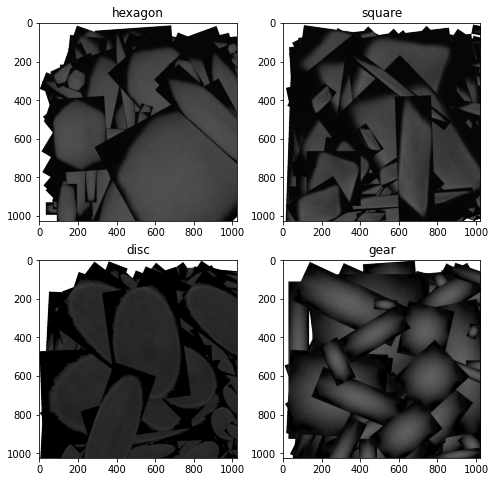

In [17]:
# Visualize some sample images from each class

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
for i, label in enumerate(class_labels):
    class_path = os.path.join(data, label)
    class_images = os.listdir(class_path)
    sample_image = plt.imread(os.path.join(class_path, class_images[0]))
    axes[i//2, i%2].imshow(sample_image)
    axes[i//2, i%2].set_title(label)
plt.show()

**Explaination** - Visualizing the all classes images. Just a rough representation how each classes image looks.

In [7]:
# convert the dataset elements to NumPy arrays
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

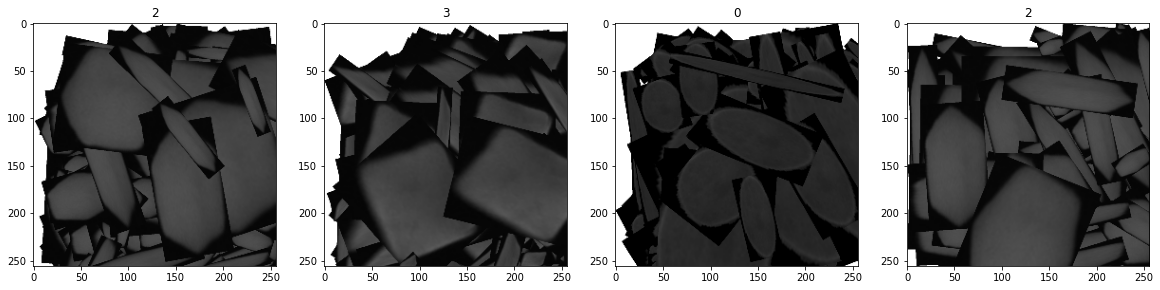

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

After the data preprocessing steps, will forward with next procedure i,e with model building where initial steps will be splitting the data and building a model based on the data we got.

## Data Modelling

## Importing the required libraries

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


## Splitting of train and valid data for model cretaion

In [19]:
# Specify the directory paths for the four image folders
train_dir = "/content/drive/MyDrive/achira_test/train"
valid_dir = "/content/drive/MyDrive/achira_test/validation"

# Define the image data generators for training and validation data
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Generate the training and validation data
train_data = train_datagen.flow_from_directory(train_dir, target_size = (64, 64), batch_size = 32, class_mode = "categorical")
valid_data = valid_datagen.flow_from_directory(valid_dir, target_size = (64, 64), batch_size = 32, class_mode = "categorical")


Found 1000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [20]:
# Define the CNN model architecture
model = Sequential()

# Add the first convolutional layer with 32 filters, a 3x3 kernel size, and ReLU activation
model.add(Conv2D(32, (3, 3), activation = "relu", input_shape = (64, 64, 3)))

# Add the first max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add the second convolutional layer with 64 filters, a 3x3 kernel size, and ReLU activation
model.add(Conv2D(64, (3, 3), activation = "relu"))

# Add the second max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add the third convolutional layer with 128 filters, a 3x3 kernel size, and ReLU activation
model.add(Conv2D(128, (3, 3), activation = "relu"))

# Add the third max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add the flattening layer to convert the 2D feature maps to a 1D feature vector
model.add(Flatten())

# Add the first fully connected layer with 512 neurons and ReLU activation
model.add(Dense(units = 512, activation = "relu"))

# Add the output layer with four neurons (one for each class) and softmax activation
model.add(Dense(units = 4, activation = "softmax"))


In [21]:
# Compile the model with categorical cross entropy loss, Adam optimizer, and accuracy metric
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])


In [23]:
# Train the model on the training data and validate it on the validation data
model_fit = model.fit(train_data, steps_per_epoch = len(train_data), epochs = 50, validation_data = valid_data, validation_steps = len(valid_data))


Epoch 1/50
32/32 [==============================] - 957s 31s/step - loss: 1.2389 - accuracy: 0.3520 - val_loss: 0.9065 - val_accuracy: 0.4700
Epoch 2/50
32/32 [==============================] - 60s 2s/step - loss: 0.8017 - accuracy: 0.5930 - val_loss: 1.2698 - val_accuracy: 0.3980
Epoch 3/50
32/32 [==============================] - 59s 2s/step - loss: 0.5998 - accuracy: 0.7350 - val_loss: 1.6327 - val_accuracy: 0.4590
Epoch 4/50
32/32 [==============================] - 59s 2s/step - loss: 0.6054 - accuracy: 0.7340 - val_loss: 0.7448 - val_accuracy: 0.6700
Epoch 5/50
32/32 [==============================] - 59s 2s/step - loss: 0.5301 - accuracy: 0.7740 - val_loss: 0.7359 - val_accuracy: 0.6730
Epoch 6/50
32/32 [==============================] - 60s 2s/step - loss: 0.3979 - accuracy: 0.8480 - val_loss: 1.1975 - val_accuracy: 0.6360
Epoch 7/50
32/32 [==============================] - 58s 2s/step - loss: 0.3853 - accuracy: 0.8450 - val_loss: 0.6776 - val_accuracy: 0.7250
Epoch 8/50
32/32 [

## Evaluate the model with test data 

In [24]:
# Evaluate the model on the test data

test_data = '/content/drive/MyDrive/achira_test/test'

test_loss, test_accuracy = model.evaluate(train_data, steps = len(train_data))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

32/32 [==============================] - 28s 888ms/step - loss: 0.0839 - accuracy: 0.9640
Test Loss: 0.08388208597898483
Test Accuracy: 0.9639999866485596


##Plot Performance

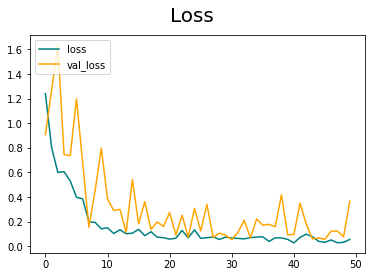

In [26]:
fig = plt.figure()
plt.plot(model_fit.history['loss'], color='teal', label='loss')
plt.plot(model_fit.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

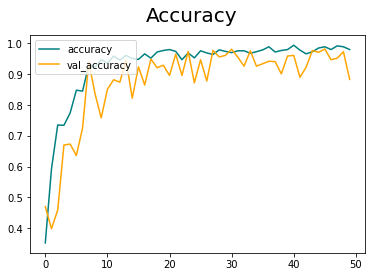

In [27]:
fig = plt.figure()
plt.plot(model_fit.history['accuracy'], color='teal', label='accuracy')
plt.plot(model_fit.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

##Model Inference/ Image Inference

In [35]:
import cv2
import numpy as np

# Define the list of class names
class_names = ['disc', 'gear', 'hexagon', 'square']

# Load the image and preprocess it
img = cv2.imread("/content/drive/MyDrive/Images_achira/shape2.png")
img = cv2.resize(img, (64, 64))
img = np.expand_dims(img, axis=0)
img = img / 255.0

# Pass the image through the model to get the predicted class probabilities
probs = model.predict(img)

# Get the predicted class label with the highest probability
predicted_class_index = np.argmax(probs)
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class name
print("Predicted Class:", predicted_class_index ,predicted_class_name)

#image view in window

# cv2.imshow("Image View", img[0])
# cv2.waitKey(0)
# cv2.destroyAllWindows()


1/1 [==============================] - 0s 32ms/step
Predicted Class: 3 square


 ## Save the Model:

In [36]:
import os
from tensorflow.keras.models import load_model

In [37]:
model.save(os.path.join('models','achira_imageclassifier.h5'))

## Final Words

The architecture uses three convolutional layers and three max pooling layers in the CNN part of the network, followed by two fully connected layers in the Dense part of the network. The total number of layers in this architecture is nine, including the input and output layers.

Breaking down the accuracy 

* Train/Valid - 98% 
* Test - 96% 
* Train/valid Loss - 0.0281 
* Test Loss: 0.08388208597898483